In [1]:
import pandas as pd
import prisma_ml as prisma
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
import pickle

In [5]:
df = pd.read_csv(r"../../../data/labelled/kmeans/emotet.csv")
df.drop("Unnamed: 0", axis=1, inplace=True)

## EDA

In [6]:
info = prisma.DatasetInformation(df)

info.dataframe_summary()

### Shape:

(79667, 31)

### Columns and Metadata:

,Data Type,Null Values,Percentage of Nulls
Duration,float64,0,0.0
Source Port,float64,0,0.0
Destination Port,float64,0,0.0
Protocol,float64,0,0.0
Flags,float64,0,0.0
Packets,float64,0,0.0
Bytes,float64,0,0.0
Mean Payload Size,float64,0,0.0
Std Payload Size,float64,0,0.0
Min Payload Size,float64,0,0.0


### Duplicated Rows:

,Duplicated Rows Count
Total,0


### Categorical

In [7]:
info = prisma.DatasetInformation(df)

info.categorical_summary()

### Categorical Columns Summary:

### Numerical

### Numerical Columns Statistical Summary:

,Duration,Source Port,Destination Port,Protocol,Flags,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,...,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,direction,short_duration,single_packet,Label
Mean,0.030691,0.685855,0.300610,0.567596,0.535083,0.004968,0.000475,0.074505,0.004539,0.072371,...,0.193681,0.761696,0.48409,0.162991,0.178443,0.756850,0.0,0.256857,0.252413,0.499642
Median,0.000003,0.821646,0.122227,0.666667,0.615385,0.005038,0.000207,0.007937,0.002668,0.005952,...,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
Mode,0.000000,0.122223,0.122227,0.666667,0.615385,0.005038,0.000207,0.007937,0.002668,0.005952,...,0.000000,1.000000,0.00000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,0.000000
Std Dev,0.130603,0.329180,0.317870,0.191066,0.191115,0.008858,0.007992,0.137898,0.027611,0.137973,...,0.230798,0.426049,0.49975,0.369360,0.382887,0.428987,0.0,0.436902,0.434400,0.500003
Variance,0.017057,0.108359,0.101041,0.036506,0.036525,0.000078,0.000064,0.019016,0.000762,0.019037,...,0.053268,0.181518,0.24975,0.136427,0.146603,0.184030,0.0,0.190884,0.188703,0.250003
Range,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000
Min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000
Max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000


### Correlation Matrix:

,Duration,Source Port,Destination Port,Protocol,Flags,Packets,Bytes,Mean Payload Size,Std Payload Size,Min Payload Size,...,flags_count,syn_count,ack_count,fin_count,is_http,is_internal_ip,direction,short_duration,single_packet,Label
Duration,1.000000,0.036620,-0.077413,0.076832,0.040129,0.215764,0.012092,-0.071131,0.006170,-0.072625,...,-0.010974,0.072955,-0.045010,0.001580,-0.046753,0.074692,NaN,-0.138155,-0.136548,0.188716
Source Port,0.036620,1.000000,-0.971709,0.432466,0.590841,0.075328,-0.029285,-0.253977,-0.067471,-0.249471,...,-0.545693,0.342129,-0.590356,-0.509767,-0.108959,0.977847,NaN,-0.318653,-0.308958,0.300540
Destination Port,-0.077413,-0.971709,1.000000,-0.424394,-0.581767,-0.091296,0.025082,0.246106,0.043000,0.243497,...,0.528136,-0.338655,0.579384,0.497022,0.114661,-0.991466,NaN,0.313048,0.307386,-0.271861
Protocol,0.076832,0.432466,-0.424394,1.000000,0.201600,0.288173,-0.027156,-0.909445,0.079648,-0.916364,...,-0.126956,0.927023,-0.535291,0.226324,-0.571418,0.433178,NaN,-0.861074,-0.871339,0.308753
Flags,0.040129,0.590841,-0.581767,0.201600,1.000000,0.081624,-0.010989,-0.184924,-0.036185,-0.184224,...,-0.433883,0.219254,-0.435697,-0.788331,-0.179345,0.584178,NaN,-0.200637,-0.191227,0.170325
Packets,0.215764,0.075328,-0.091296,0.288173,0.081624,1.000000,0.870550,-0.207437,0.311916,-0.278244,...,0.136267,0.310270,-0.043101,0.151374,-0.257689,0.089683,NaN,-0.321172,-0.325864,0.049047
Bytes,0.012092,-0.029285,0.025082,-0.027156,-0.010989,0.870550,1.000000,0.109226,0.297066,0.031569,...,0.043951,-0.024480,0.033174,0.014038,0.013974,-0.024892,NaN,0.020084,0.020100,-0.023269
Mean Payload Size,-0.071131,-0.253977,0.246106,-0.909445,-0.184924,-0.207437,0.109226,1.000000,0.011409,0.993061,...,0.114207,-0.876922,0.498105,-0.223209,0.591421,-0.248230,NaN,0.816086,0.824412,-0.296413
Std Payload Size,0.006170,-0.067471,0.043000,0.079648,-0.036185,0.311916,0.297066,0.011409,1.000000,-0.081168,...,0.189486,0.087740,0.073347,0.137211,-0.075616,-0.052546,NaN,-0.065391,-0.095528,-0.061470
Min Payload Size,-0.072625,-0.249471,0.243497,-0.916364,-0.184224,-0.278244,0.031569,0.993061,-0.081168,1.000000,...,0.103817,-0.884638,0.496233,-0.230656,0.598197,-0.245739,NaN,0.822838,0.832944,-0.293332


### Correlation Matrix Heatmap:

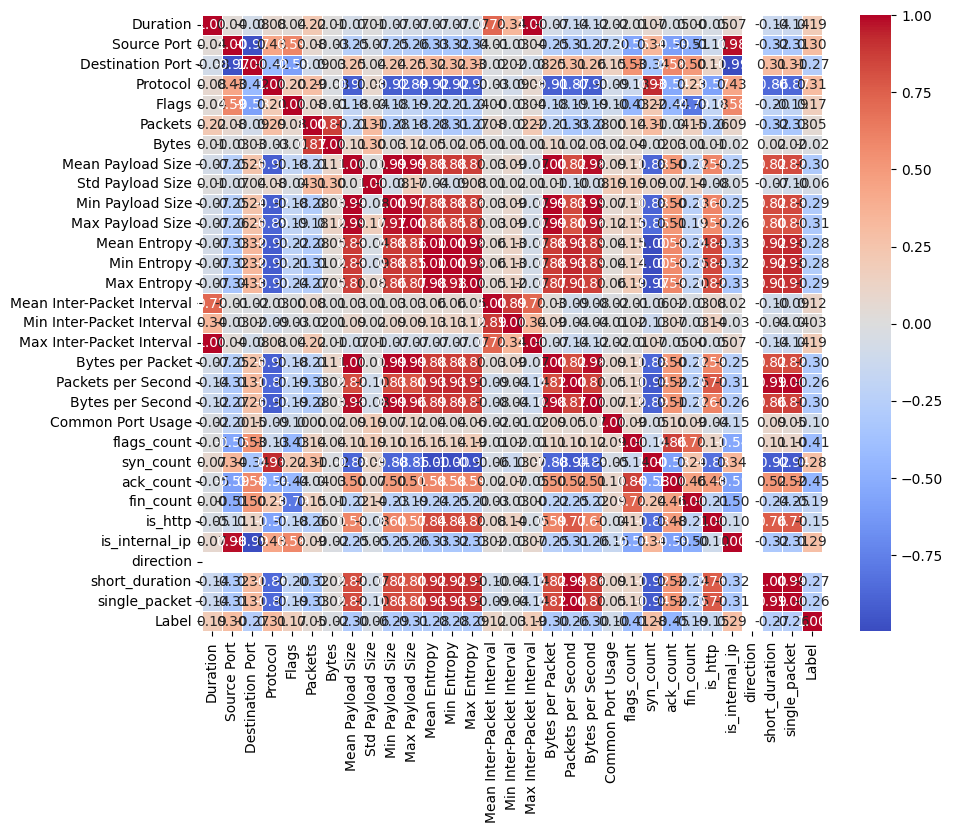

In [8]:
info.numerical_summary()

## Modeling

### Final Data Prep

In [9]:
def save_as_pickle(path, variable):
    with open(path, "wb") as file:
        pickle.dump(variable, file)

#### Encoding

In [7]:
encoder = LabelEncoder()

# Columns to encode
columns_to_encode = ["Protocol", "Flags", "Label", "direction"]

# Apply label encoding to each column
for column in columns_to_encode:
    # Fit label encoder and return encoded labels
    path = "../../variables/emotet/static_no_pca" + column + "_Encoder.pkl"
    df[column] = encoder.fit_transform(df[column])
    save_as_pickle(path, encoder)

#### Type Casting

In [8]:
df["Bytes"] = df["Bytes"].astype("float64")
df["Duration"] = df["Duration"].astype("float64")
df["Packets"] = df["Packets"].astype("float64")
df["flags_count"] = df["flags_count"].astype("float64")

In [9]:
#df.drop(["Protocol","Packets","Bytes","Duration", "bytes_per_packet","fin_count", "packet_length", "short_duration","Source Port"], axis=1,inplace=True)

### Data Splitting

In [10]:
# Separate the 'Status' column
label_column = df["Label"]
dropped_df = df.drop("Label", axis=1)

# Initialize and apply MinMaxScaler to the dropped_df
scaler = MinMaxScaler()
scaled_dropped_df = scaler.fit_transform(dropped_df.to_numpy())
print(dropped_df.columns)
# Create a DataFrame from the scaled dropped_df
df = pd.DataFrame(scaled_dropped_df, columns=dropped_df.columns)

# Reattach the 'Status' column
df["Label"] = label_column

df.to_csv("../../data/modelling/emotet.csv")

save_as_pickle(r"../../variables/emotet/static_no_pca/scaler.pkl", scaler)

Index(['Duration', 'Source Port', 'Destination Port', 'Protocol', 'Flags',
       'Packets', 'Bytes', 'Mean Payload Size', 'Std Payload Size',
       'Min Payload Size', 'Max Payload Size', 'Mean Entropy', 'Min Entropy',
       'Max Entropy', 'Mean Inter-Packet Interval',
       'Min Inter-Packet Interval', 'Max Inter-Packet Interval',
       'Bytes per Packet', 'Packets per Second', 'Bytes per Second',
       'Common Port Usage', 'flags_count', 'syn_count', 'ack_count',
       'fin_count', 'is_http', 'is_internal_ip', 'direction', 'short_duration',
       'single_packet'],
      dtype='object')


## Models

### Model Creation and Parameters

In [10]:
#! Model Evaluation
test_size = 0.3
iterations = 30

#! KNN
n_neighbors = 5
knn_train_model = KNeighborsClassifier(n_neighbors=n_neighbors)

#! Random Forest
n_estimators = 100  # You can adjust this number as needed
rf_train_model = RandomForestClassifier(n_estimators=n_estimators)

#! Logistic Regression
max_iter = 5000
logreg_model = LogisticRegression(max_iter=max_iter)

In [11]:
df["Label"].isna().value_counts()

Label
False    79667
Name: count, dtype: int64

### Splitting

In [12]:
# Reset the index to convert it to a normal column (if needed)
df_reset = df.reset_index(drop=True)  # This will drop the old index column
X = df_reset.drop("Label", axis=1)  # Now drop the Label
if 'index' in X.columns:
    X.drop('index', axis=1, inplace=True)
y = df["Label"]

### KNN

In [45]:
knn_normal = prisma.MachineLearning()
knn_normal_metrics, avg_knn_normal_metrics, knn_normal_model = (
    knn_normal.evaluate_model(X, y, test_size, iterations, knn_train_model)
)

Evaluating model: 100%|██████████| 30/30 [00:56<00:00,  1.88s/it]


### Random Forest

In [46]:
rf_normal = prisma.MachineLearning()
(
    rf_normal_metrics,
    avg_rf_normal_metrics,
    rf_normal_model,
) = rf_normal.evaluate_model(X, y, test_size, iterations, rf_train_model)

Evaluating model:   3%|▎         | 1/30 [00:16<08:08, 16.85s/it]


KeyboardInterrupt: 

### Logistic Regression

In [13]:


logreg_normal = prisma.MachineLearning()
(
    logreg_normal_metrics,
    avg_logreg_normal_metrics,
    logreg_normal_model,
) = logreg_normal.evaluate_model(X, y, test_size, iterations, logreg_model)

Evaluating model:   0%|          | 0/30 [00:00<?, ?it/s]

Evaluating model: 100%|██████████| 30/30 [00:28<00:00,  1.07it/s]


### Model Evaluation

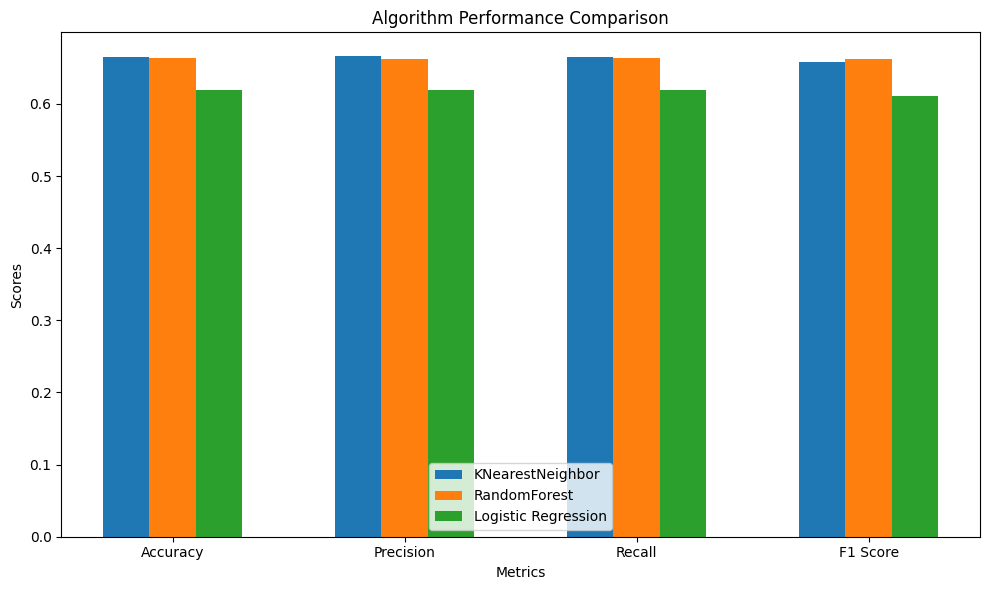

In [20]:
normal_metrics = {"KNearestNeighbor":avg_knn_normal_metrics, "RandomForest":avg_rf_normal_metrics, "Logistic Regression":avg_logreg_normal_metrics}
plot = prisma.Plotting(df)

plot.plot_algorithm_comparison(normal_metrics)

In [21]:
normal_metrics

{'KNearestNeighbor': {'Accuracy': 0.665,
  'Precision': 0.666,
  'Recall': 0.665,
  'F1 Score': 0.658},
 'RandomForest': {'Accuracy': 0.664,
  'Precision': 0.663,
  'Recall': 0.664,
  'F1 Score': 0.663},
 'Logistic Regression': {'Accuracy': 0.62,
  'Precision': 0.619,
  'Recall': 0.62,
  'F1 Score': 0.611}}

In [28]:
save_as_pickle(r"../../models/Rbot_KNN.pkl", knn_normal_model)

In [14]:
avg_logreg_normal_metrics


{'Accuracy': 0.735, 'Precision': 0.738, 'Recall': 0.735, 'F1 Score': 0.734}

In [15]:
logreg_normal_metrics

,Accuracy,Precision,Recall,F1 Score
0,0.733735,0.736975,0.733735,0.733203
1,0.738086,0.740822,0.738086,0.737292
2,0.733358,0.735016,0.733358,0.732693
3,0.734530,0.737137,0.734530,0.733948
4,0.738295,0.741061,0.738295,0.737526
5,0.731015,0.733491,0.731015,0.730267
6,0.734112,0.737146,0.734112,0.733353
7,0.734279,0.736541,0.734279,0.733660
8,0.731727,0.733759,0.731727,0.731166
9,0.734112,0.737220,0.734112,0.733313


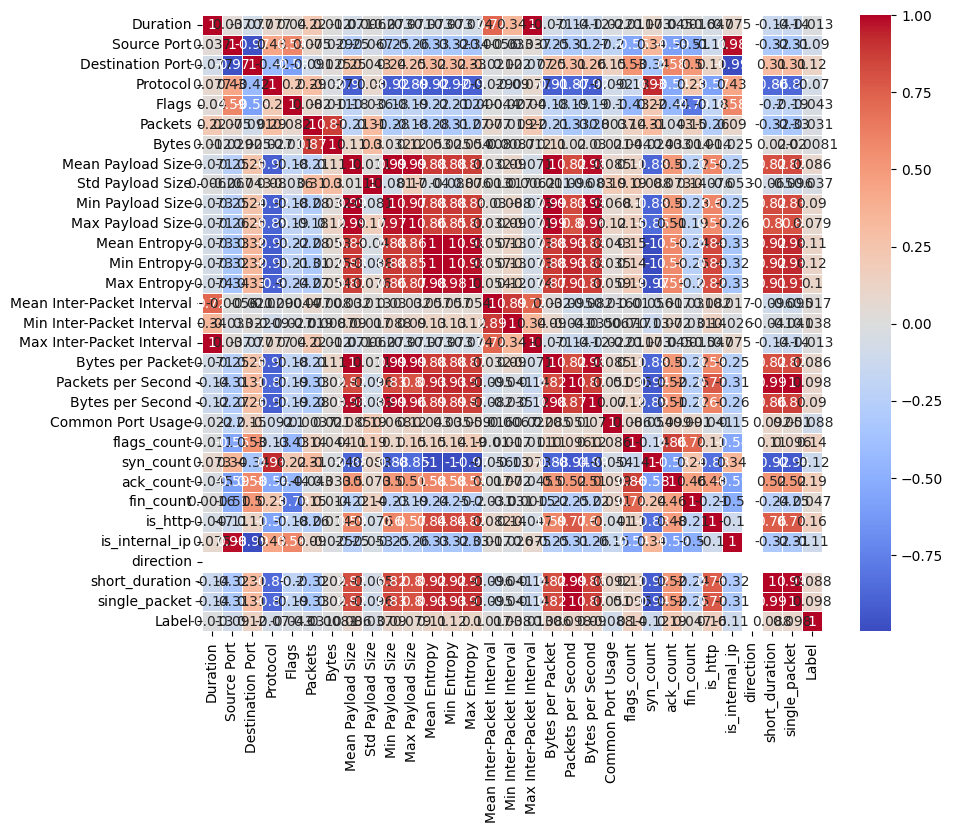

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

correlation_matrix = df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(10, 8))

# Draw the heatmap with seaborn
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)

# Display the heatmap
plt.show()

In [16]:
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=23, stratify=y
)

# Define the XGBoost classifier with default settings
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    eval_metric='logloss',
    scale_pos_weight=1.2,
    max_depth=3,
    alpha=0.9,  # L1 regularization
    reg_lambda=0.9,        # L2 regularization (formerly lambda_)
    n_estimators=100,  # Control the number of trees
    learning_rate=0.125,  # Decreased learning rate
    subsample=0.8,  # Use 80% of data for training each tree
    random_state=23  # For reproducibility
)
#! 0.1, 0.11,
# Fit the model on training data
xgb_model.fit(X_train, y_train)

# Make predictions on the test set
y_pred = xgb_model.predict(X_test)

# Evaluate the model
print("Accuracy: ", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy:  0.8493368478306347
Confusion Matrix:
 [[ 8403  3556]
 [   45 11897]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.70      0.82     11959
           1       0.77      1.00      0.87     11942

    accuracy                           0.85     23901
   macro avg       0.88      0.85      0.85     23901
weighted avg       0.88      0.85      0.85     23901



In [17]:
# Check the performance on the training data
y_train_pred = xgb_model.predict(X_train)

# Evaluate on training data
train_accuracy = accuracy_score(y_train, y_train_pred)
print(f"Training Accuracy: {train_accuracy}")

# You already have test accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {test_accuracy}")

Training Accuracy: 0.8490478069074346
Test Accuracy: 0.8493368478306347


In [18]:
from sklearn.model_selection import cross_val_score

# Perform k-fold cross-validation
cv_scores = cross_val_score(xgb_model, X, y, cv=5)

# Print the average accuracy across the folds
print(f"Cross-Validation Accuracy: {cv_scores.mean()}")


Cross-Validation Accuracy: 0.7622593058287233


/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
10 fits failed out of a total of 25.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
10 fits failed with the following error:
Traceback (most recent call last):
  File "/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/home/yousinator/.cache/pypoetry/virtualenvs/c2-detection-TvTzD0kY-py3.10/lib/python3.10/site-packages/xgboost/core.py", line 726, in inner_f
    return func(**kwargs)
  File "/home/

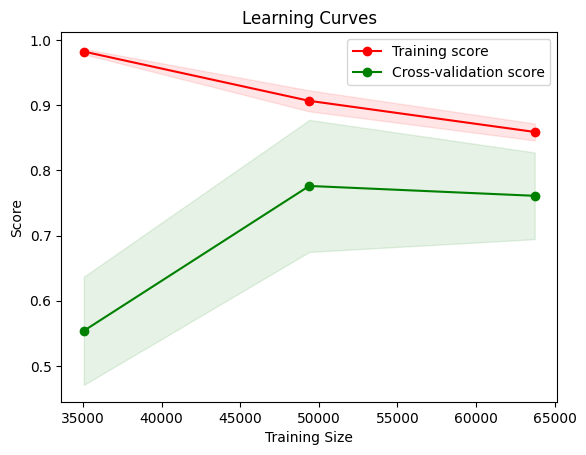

In [19]:
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

# Generate learning curve data
train_sizes, train_scores, test_scores = learning_curve(
    xgb_model, X, y, cv=5, n_jobs=-1, train_sizes=np.linspace(0.1, 1.0, 5)
)

# Calculate mean and standard deviation for training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot learning curves
plt.plot(train_sizes, train_mean, 'o-', color="r", label="Training score")
plt.plot(train_sizes, test_mean, 'o-', color="g", label="Cross-validation score")

plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1, color="g")

plt.xlabel("Training Size")
plt.ylabel("Score")
plt.title("Learning Curves")
plt.legend(loc="best")
plt.show()


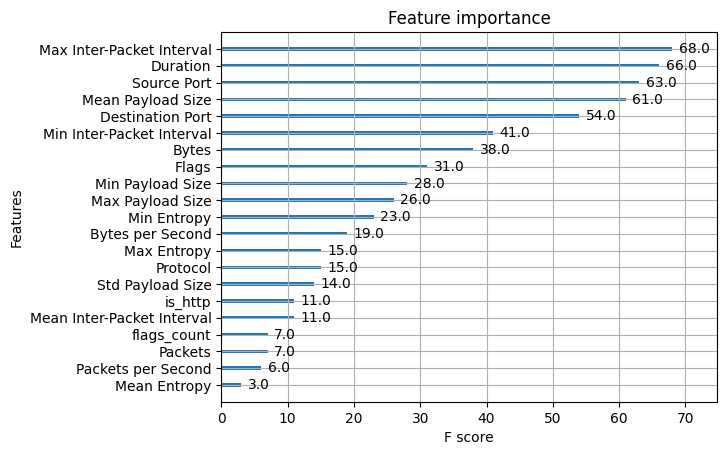

In [118]:
import matplotlib.pyplot as plt
xgb.plot_importance(xgb_model)
plt.show()


In [47]:
save_as_pickle(r"../../models/dridex/xgb.pkl", xgb_model)

In [21]:
save_as_pickle(r"../../models/emotet/logreg.pkl", logreg_normal_model)